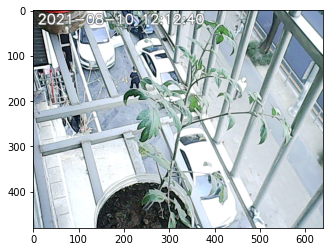

In [18]:
import cv2
from matplotlib import pyplot as plt
import matplotlib
import time
%matplotlib inline
cap = cv2.VideoCapture(0)
ret,frame =cap.read()
if (not ret or frame is None):
    cap.release()
    time.sleep(2)
    cap = cv2.VideoCapture(0)
    ret,frame =cap.read()
    if(not ret or frame is None):
        cap.release()
        time.sleep(2)
        cap = cv2.VideoCapture(0)
        ret,frame =cap.read()
        if(not ret or frame is None):
            cap.release()
            
if(ret):
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#     cv2.rectangle(frame,(10,50),(50,100),(255,0,0),-1)
    frame = cv2.putText(frame,"2021-08-10 12:12:40",(10,30),cv2.FONT_HERSHEY_SIMPLEX,1.0,(50,50,50),4,cv2.LINE_AA,False)
    frame = cv2.putText(frame,"2021-08-10 12:12:40",(10,30),cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,255,255),2,cv2.LINE_AA,False)
    cv2.imwrite('image/123.jpg',frame)
    cap.release()
    plt.imshow(frame)


In [9]:
import cv2
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
try:
    
    frame = cv2.imread('image/2021-9-2 10:36:37.jpg')
#     plt.imshow(frame)
#     if frame.size==921600:
    if frame is not None:
        print('12')
        plt.imshow(frame)
except Exception as e :
    print(e)
    print('14')

In [23]:
is_write = cv2.imwrite('123.jpg',frame)
is_write

error: OpenCV(4.5.3) /tmp/pip-req-build-kzbzo44i/opencv/modules/imgcodecs/src/loadsave.cpp:803: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [ ]:
import socket
import cv2
from matplotlib import pyplot as plt
import matplotlib
import time
server = socket.socket()
server.bind(('0.0.0.0',8880))
server.listen(10)
while True:
    connection,address = server.accept()
    try:
        connection.settimeout(30)
        buf = connection.recv(1024)
        buf = buf.splitlines()[-1]
        cap = cv2.VideoCapture(0)
        ret,frame =cap.read()
        if(not ret):
            cap.release()
            time.sleep(2)
            cap = cv2.VideoCapture(0)
            ret,frame =cap.read()
            if(not ret):
                cap.release()
                time.sleep(2)
                cap = cv2.VideoCapture(0)
                ret,frame =cap.read()
                if(not ret):
                    cap.release()

        if(ret):
            frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
            cv2.imwrite('image/'+buf.decode()+'.jpg',frame)
            cap.release()
            plt.imshow(frame)        
            connection.send(b"HTTP/1.1 200 OK\r\n\r\nhello web")
        
    except Exception as e :
        connection.send(b"HTTP/1.1 202 OK\r\n\r\nerrer")
        connection.close()
    connection.close()


In [5]:
import psycopg2
conn = psycopg2.connect(database="Monitor",user="****",password="****",host="timescaledb",port="5432")
cur =conn.cursor()
# cur.execute("SELECT * FROM public.data WHERE date>'2021-08-26 1:00:00' ORDER BY id DESC LIMIT 100")#因为时区不同，日期减去8小时
cur.execute("SELECT * FROM public.data WHERE (date_part('hour',date)>21 or date_part('hour',date)<10) and date>'2021-12-7 00:00:00' and date<'2022-1-7 00:00:00' and id%10=0 ORDER BY id ASC LIMIT 100000")#因为时区不同，日期减去8小时
# cur.execute("SELECT * FROM public.data WHERE date>'2021-9-22 22:00:00 ' and id%10=0 ORDER BY id ASC LIMIT 100000")#因为时区不同，日期减去8小时
rows = cur.fetchall()
conn.close()
#rows


In [2]:
rows[0][7]
path = 'image/'+rows[0][7].replace('%20',' ')
path

'image/2021-10-5 8:4:9.jpg'

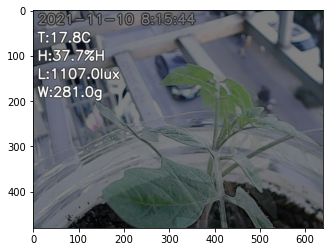

In [2]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
path = 'image/'+rows[1][7].replace('%20',' ')
img = cv2.imread(path)
path1 = 'image/'+rows[2][7].replace('%20',' ')
img1 = cv2.imread(path1)

img =img*0.4 +img1*0.1
img = img.astype('uint8')
img = cv2.putText(img,"T:"+'%0.1f'%rows[0][3]+'C',(10,70),cv2.FONT_HERSHEY_SIMPLEX,1.0,(50,50,50),5,cv2.LINE_AA,False)
img = cv2.putText(img,"T:"+'%0.1f'%rows[0][3]+'C',(10,70),cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,255,255),2,cv2.LINE_AA,False)
img = cv2.putText(img,"H:"+'%0.1f'%rows[0][4]+'%H',(10,110),cv2.FONT_HERSHEY_SIMPLEX,1.0,(50,50,50),5,cv2.LINE_AA,False)
img = cv2.putText(img,"H:"+'%0.1f'%rows[0][4]+'%H',(10,110),cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,255,255),2,cv2.LINE_AA,False)
img = cv2.putText(img,"L:"+'%0.1f'%rows[0][5]+'lux',(10,150),cv2.FONT_HERSHEY_SIMPLEX,1.0,(50,50,50),5,cv2.LINE_AA,False)
img = cv2.putText(img,"L:"+'%0.1f'%rows[0][5]+'lux',(10,150),cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,255,255),2,cv2.LINE_AA,False)
img = cv2.putText(img,"W:"+'%0.1f'%rows[0][6]+'g',(10,190),cv2.FONT_HERSHEY_SIMPLEX,1.0,(50,50,50),5,cv2.LINE_AA,False)
img = cv2.putText(img,"W:"+'%0.1f'%rows[0][6]+'g',(10,190),cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,255,255),2,cv2.LINE_AA,False)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import IPython.display as display
fps = 24
size = (640,480)
# videowriter = cv2.VideoWriter("video/123.avi",cv2.VideoWriter_fourcc('M','J','P','G'),fps,size)
videowriter = cv2.VideoWriter("video/12-7.mp4",cv2.VideoWriter_fourcc('m','p','4','v'),fps,size)
num=0
path = 'image/'+rows[1][7].replace('%20',' ')
path1 = 'image/'+rows[0][7].replace('%20',' ')
img1 = cv2.imread(path)
for i in rows:
    path = 'image/'+i[7].replace('%20',' ')
    img = cv2.imread(path)
    img =img*0.3 +img1*0.7
    img1 = img
    img = img.astype('uint8')    
    img2 = cv2.putText(img,"T:"+'%0.1f'%i[3]+'C',(10,70),cv2.FONT_HERSHEY_SIMPLEX,1.0,(50,50,50),5,cv2.LINE_AA,False)
    img2 = cv2.putText(img2,"T:"+'%0.1f'%i[3]+'C',(10,70),cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,255,255),2,cv2.LINE_AA,False)
    img2 = cv2.putText(img2,"H:"+'%0.1f'%i[4]+'%H',(10,110),cv2.FONT_HERSHEY_SIMPLEX,1.0,(50,50,50),5,cv2.LINE_AA,False)
    img2 = cv2.putText(img2,"H:"+'%0.1f'%i[4]+'%H',(10,110),cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,255,255),2,cv2.LINE_AA,False)
    img2 = cv2.putText(img2,"L:"+'%0.1f'%i[5]+'lux',(10,150),cv2.FONT_HERSHEY_SIMPLEX,1.0,(50,50,50),5,cv2.LINE_AA,False)
    img2 = cv2.putText(img2,"L:"+'%0.1f'%i[5]+'lux',(10,150),cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,255,255),2,cv2.LINE_AA,False)
    img2 = cv2.putText(img2,"W:"+'%0.1f'%i[6]+'g',(10,190),cv2.FONT_HERSHEY_SIMPLEX,1.0,(50,50,50),5,cv2.LINE_AA,False)
    img2 = cv2.putText(img2,"W:"+'%0.1f'%i[6]+'g',(10,190),cv2.FONT_HERSHEY_SIMPLEX,1.0,(255,255,255),2,cv2.LINE_AA,False)
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    videowriter.write(img2)
    
    display.clear_output()
    num=num+1
    print(num/len(rows)*100)
videowriter.release()

100.0


In [22]:
import IPython.display as display

print(len(rows))
display.clear_output()